# Importing Libraries

In [ ]:
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
import joblib
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

# Read Data

In [ ]:
x_test_1 = pd.read_csv("Data/x_test_1.csv")
x_test_2 = pd.read_csv("Data/x_test_2.csv")
x_test_3 = pd.read_csv("Data/x_test_3.csv")

rem = np.load("Data/test_removed.npy")
x_test_1.drop(index = rem, axis = 0, inplace = True)
x_test_2.drop(index = rem, axis = 0, inplace = True)
x_test_3.drop(index = rem, axis = 0, inplace = True)

x_test_1 = np.array(x_test_1)
x_test_2 = np.array(x_test_2)
x_test_3 = np.array(x_test_3)

test_embedding = np.load("Data/test_embedding.npy")
y_test = pd.read_csv("Data/org_test.csv", usecols = ["label"])
y_test.drop(index = rem, axis = 0, inplace = True)

x_test = np.hstack((x_test_1, x_test_2, x_test_3, test_embedding))

In [ ]:
print("Number of Rows in X_Test =", x_test.shape[0])
print("Number of Columns in X_Test =", x_test.shape[1])

Number of Rows in X_Test = 1501383
Number of Columns in X_Test = 101


In [ ]:
# Loading the ML Model
model = joblib.load('model/model.joblib')

In [ ]:
y_pred = model.predict(x_test)

# Model Result

In [ ]:
print("Accuracy on Test Data =", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision  on Test Data =", precision_score(y_test, y_pred) * 100, "%")
print("Recall on Test Data =", recall_score(y_test, y_pred) * 100, "%")
print("F1 Score on Test Data =", f1_score(y_test, y_pred))

Accuracy on Test Data = 93.88690294215401 %
Precision  on Test Data = 96.10737560918342 %
Recall on Test Data = 91.4940977987823 %
F1 Score on Test Data = 0.9374401451580032


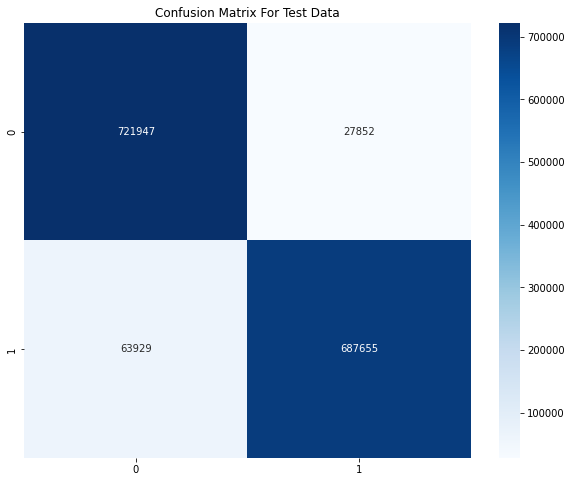

In [ ]:
# Getting Confusion matrix for Test Data
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix For Test Data")
plt.show()

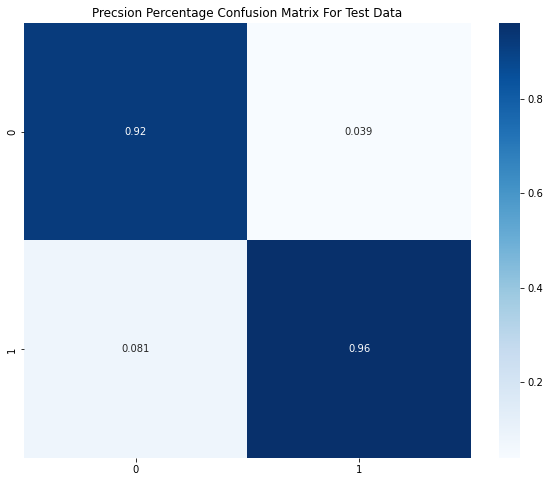

In [ ]:
# precision percentage confusion matrix for Test data for class 1 and class 0
CM = confusion_matrix(y_test, y_pred)
CM = CM / CM.sum(axis = 0)
plt.figure(figsize = (10, 8))
sns.heatmap(CM, annot = True, cmap = "Blues")
plt.title("Precsion Percentage Confusion Matrix For Test Data")
plt.show()

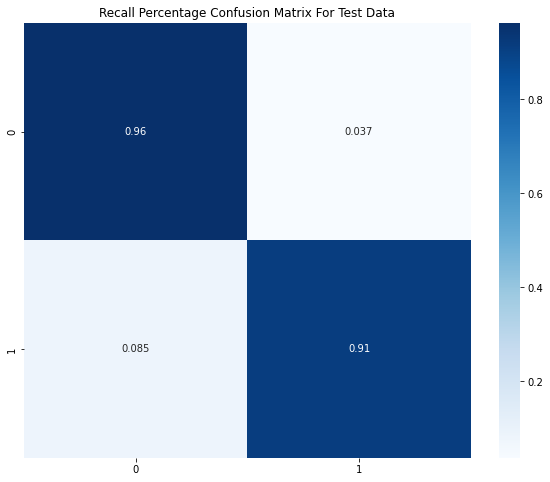

In [ ]:
# recall percentage confusion matrix for Test data for class 1 and class 0
CM = confusion_matrix(y_test, y_pred)
CM = ((CM.T) / CM.sum(axis = 1)).T
plt.figure(figsize = (10, 8))
sns.heatmap(CM, annot = True, cmap = "Blues")
plt.title("Recall Percentage Confusion Matrix For Test Data")
plt.show()